In [2]:
import scGCO

# read spatial expression data

#ff = 'Data/MOB-breast-cancer/Rep11_MOB_count_matrix-1.tsv'

ff = 'notebooks/data/Rep11_MOB_count_matrix-1.tsv'
locs, data = scGCO.read_spatial_expression(ff)
# remove genes expressed in less than 10 cells
data = data.loc[:,(data != 0).astype(int).sum(axis=0) >= 10]
# normalize expression and use 1000 genes to test the algorithm
data_norm = scGCO.normalize_count_cellranger(data)
data_norm = data_norm.iloc[:,0:1000]
import time
# estimate number of segments
factor_df, size_factor = scGCO.estimate_smooth_factor(locs, data_norm)
start_ts = time.time()
# run the main algorithm to identify spatially expressed genes
# this should take less than a minute 
result_df = scGCO.identify_spatial_genes(locs, data_norm, size_factor)
end_ts = time.time()
print('seconds to run: ', end_ts-start_ts)

100%|██████████| 8/8 [00:30<00:00,  3.75s/it]


seconds to run:  30.403234243392944


/home/covo/anaconda3/lib/python3.6/site-packages/scipy/spatial/_plotutils.py:20: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()
/home/covo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


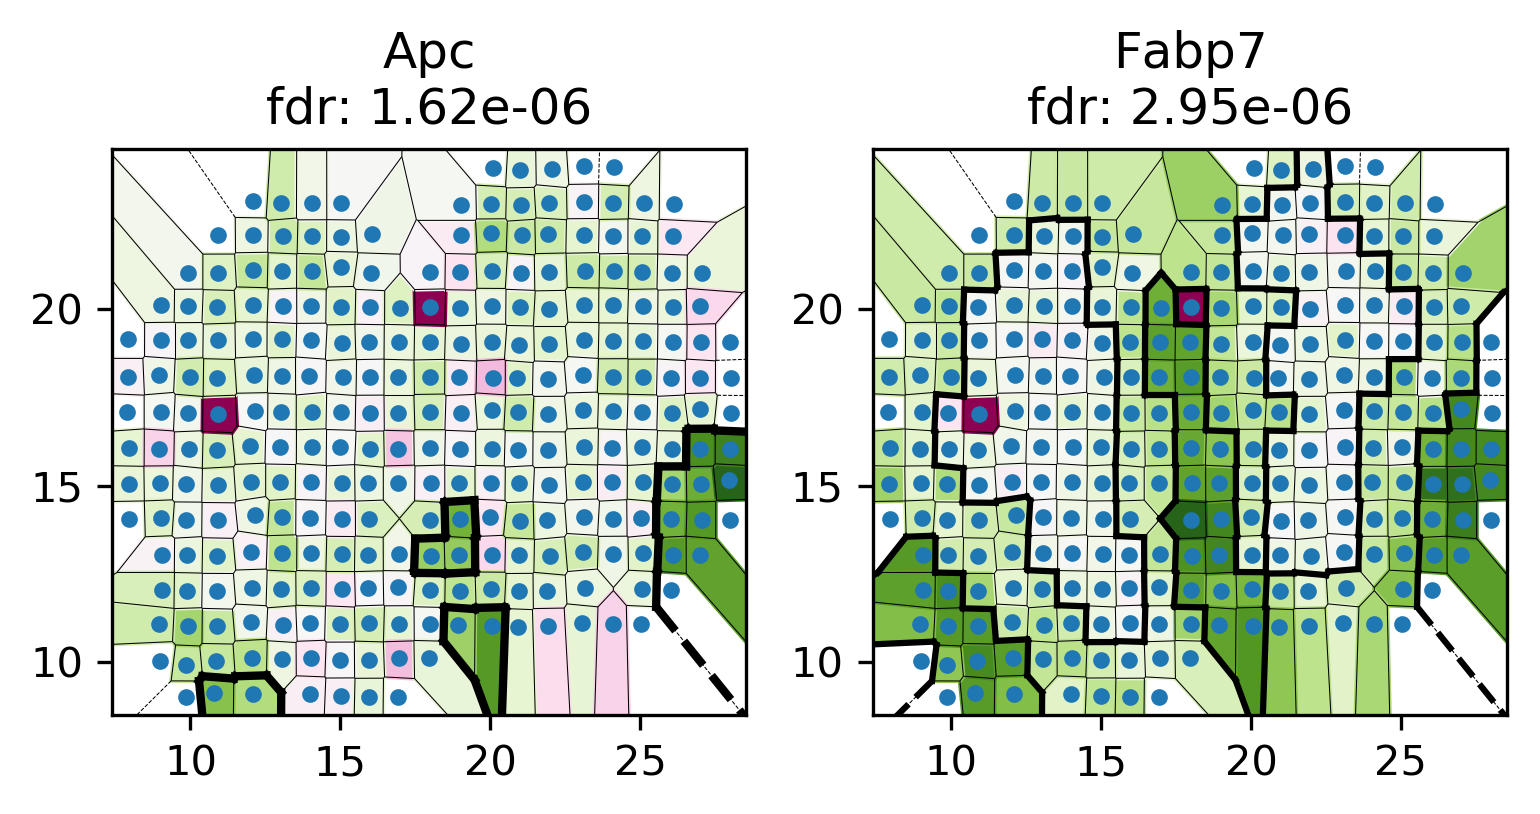

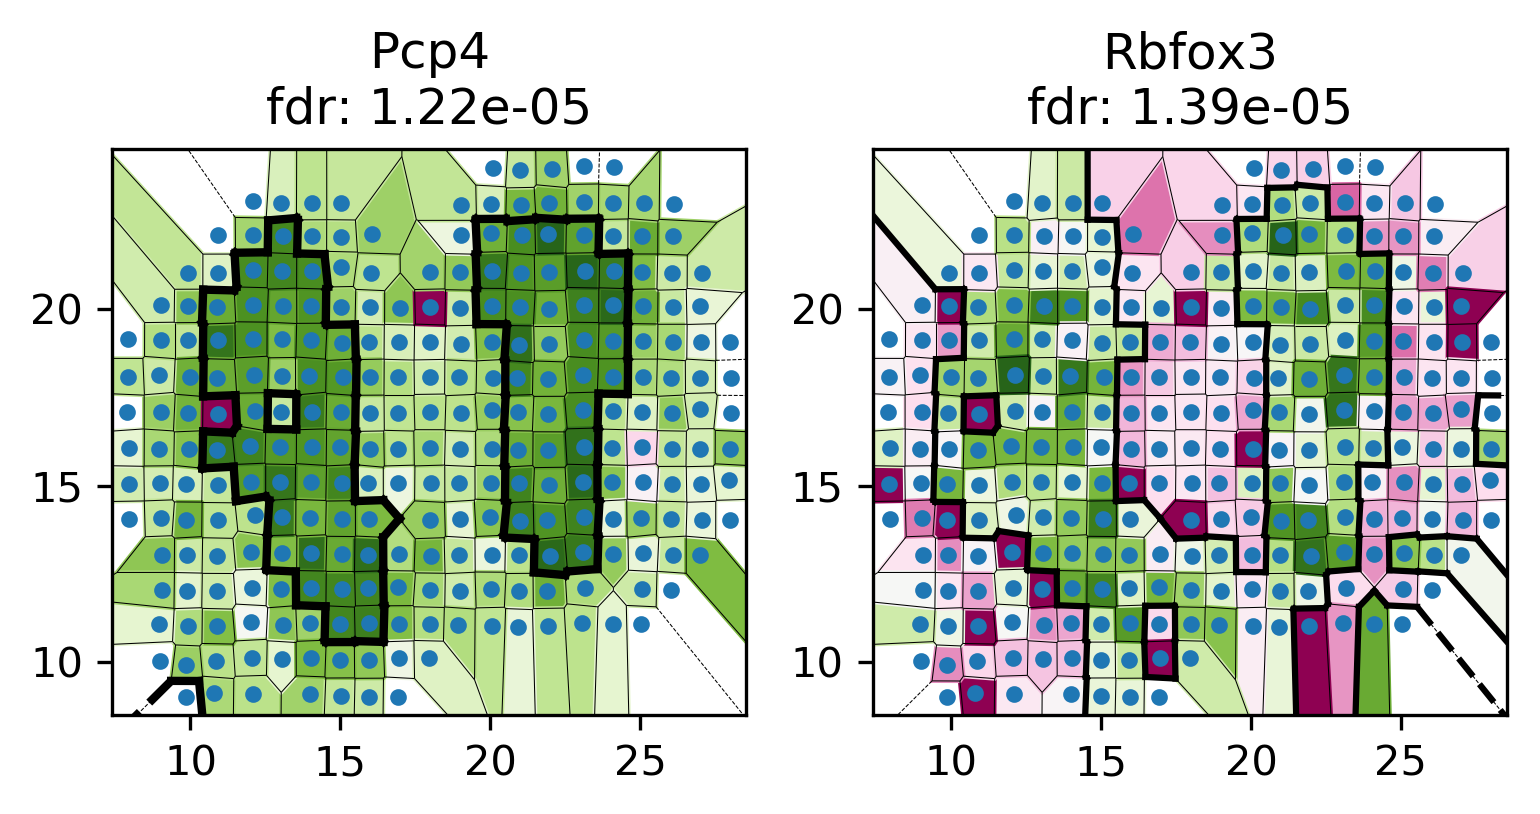

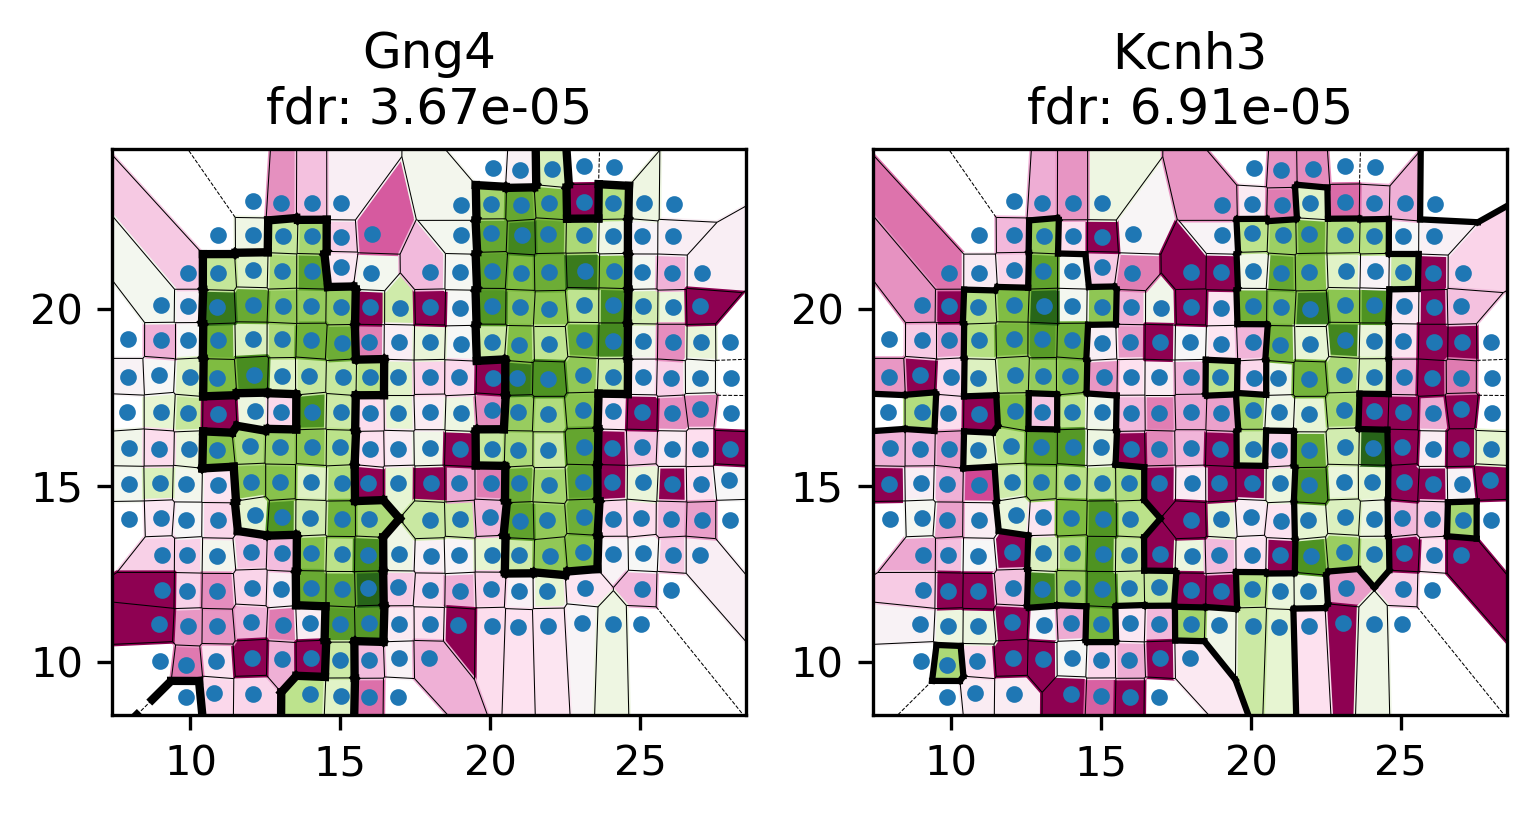

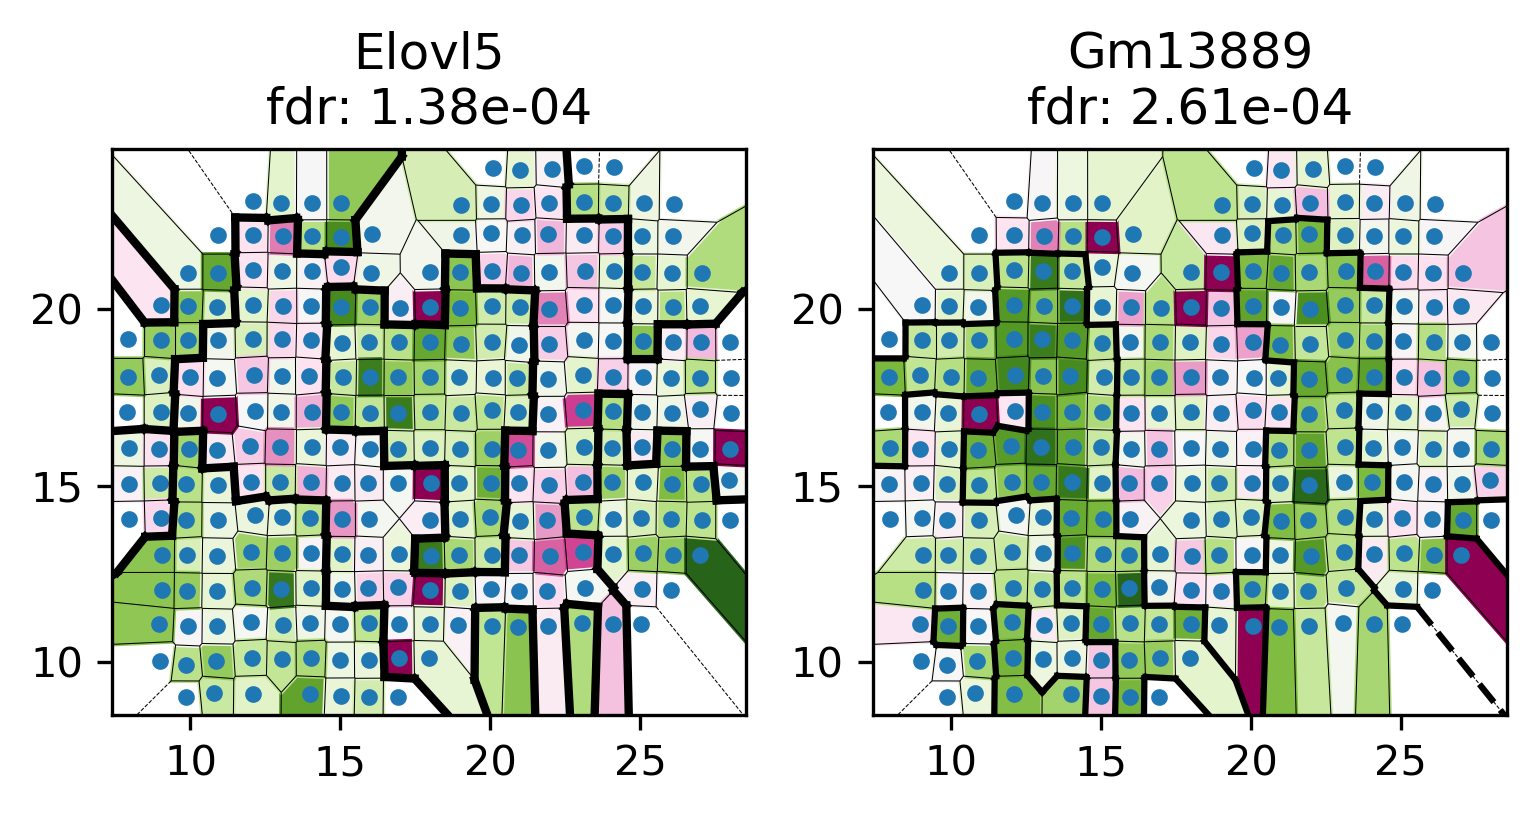

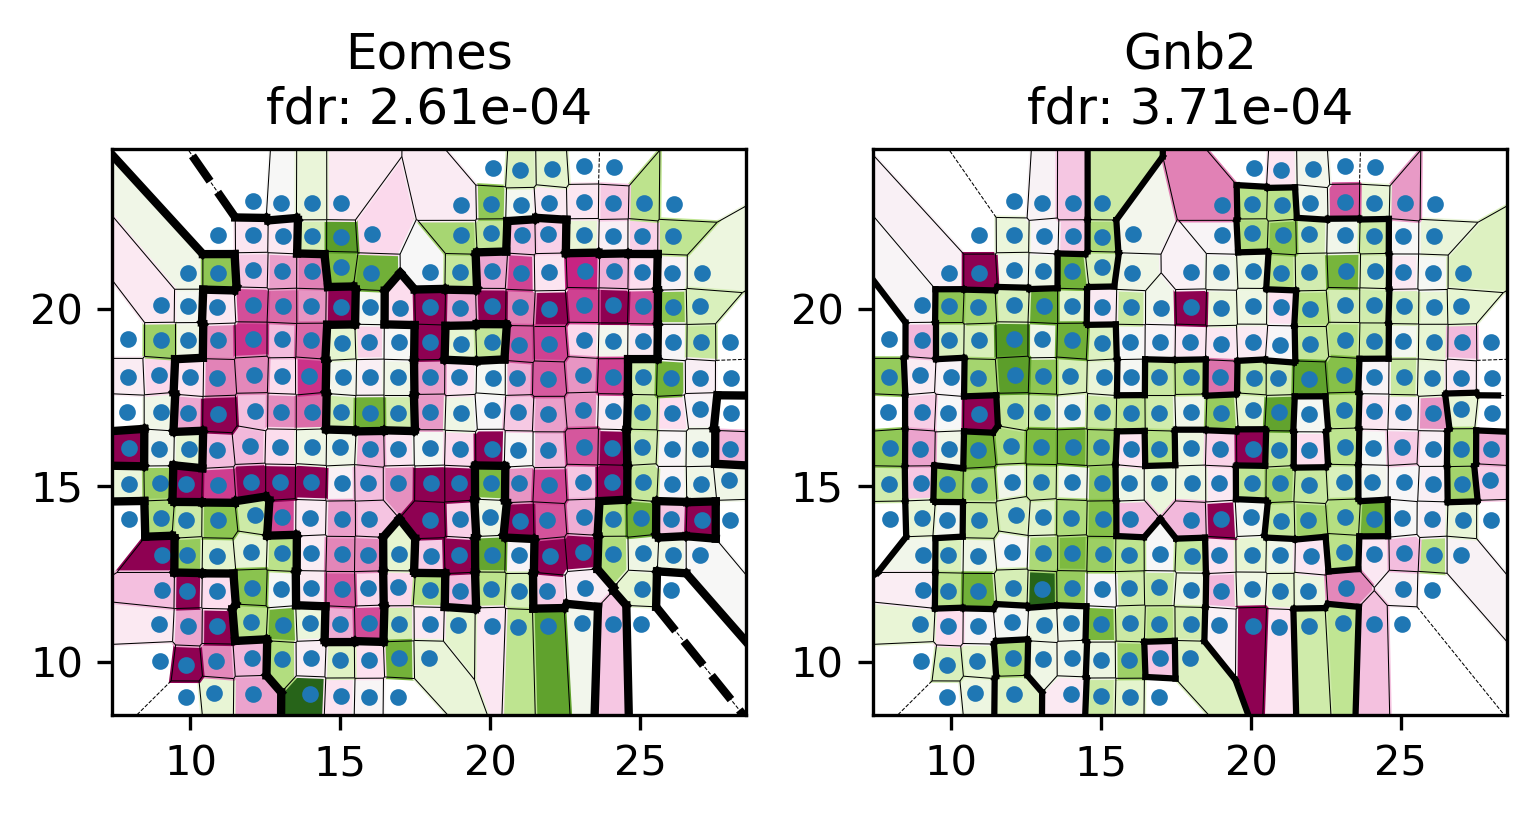

In [3]:
# select spatially expressed gene with fdr < 0.01
fdr01 = result_df[result_df.fdr < 0.01].sort_values(by=['fdr'])
# visualize top genes
scGCO.visualize_spatial_genes(fdr01.iloc[0:10,], locs, data_norm)
# save top genes to pdf
scGCO.multipage_pdf_visualize_spatial_genes(fdr01.iloc[0:10,], locs, data_norm, 'top_genes.pdf')